In [1]:
import pandas as pd

from os import listdir
from os.path import isfile, join

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
# Paths
DATA_PATH = '../data/'
OUTPUT = '../output_data/'
MODEL_PATH = '../data/models/'

In [4]:
# Check files in data folder
datafiles = [f for f in listdir(DATA_PATH) if isfile(join(DATA_PATH, f))]

print('Index, Filename')
print(list(zip([index for index, value in enumerate(datafiles)], datafiles)))

Index, Filename
[(0, 'deepfake_txt.csv'), (1, 'arxiv_disinformation.csv'), (2, 'arxiv_deepfake.csv'), (3, 'results.csv'), (4, 'reddit_machinelearning.csv'), (5, 'test_df.csv'), (6, 'mit_data.csv'), (7, 'importai_data.csv'), (8, 'cna_CNA_data.csv'), (9, 'synced_data.csv'), (10, 'ieee_data.csv'), (11, 'test_compiled.csv'), (12, 'data_with_labels.csv'), (13, 'test_output.csv')]


In [5]:
# Get a file name, can use
filename = datafiles[-1]
filename
#filename2 = 'arxiv_disinformation.csv'

'test_output.csv'

In [7]:
# Load dataframe
CONVERTERS = {'tokens': eval, 'published_parsed': eval, 'tags': eval, 'arxiv_primary_category': eval}

df1 = pd.read_csv(DATA_PATH + filename, converters=CONVERTERS)
#df2 = pd.read_csv(DATA_PATH + filename2, converters=CONVERTERS)


In [8]:
df1.head(1)

,title,url,date,summary,text,cleaning,tokens,category
0,Meta has built a massive new language AI—and i...,https://www.technologyreview.com/2022/05/03/10...,2022-05-03,Facebook’s parent company is inviting research...,Meta’s AI lab has created a massive new langua...,Meta’s AI lab has created a massive new langua...,"[ai, lab, create, massive, new, language, mode...",1.0


In [9]:
df = df1[['title', 'category']]

In [11]:
for index, row in df.iterrows():
      print(row.title)
      print(row.category)

Meta has built a massive new language AI—and it’s giving it away for free
1.0
The Download: Language-preserving AI, and hackers showed it’s frighteningly easy to breach critical infrastructure
0.0
A new vision of artificial intelligence for the people
1.0
How the AI industry profits from catastrophe
0.0
Artificial intelligence is creating a new colonial world order
0.0
How to solve AI’s inequality problem
0.0
The Download: How a Zambian morgue is exposing the real covid toll in Africa
0.0
Embracing culture change on the path to digital transformation
0.0
DeepMind’s Flamingo Visual Language Model Demonstrates SOTA Few-Shot Multimodal Learning Capabilities
1.0
Waymo & Google’s PolyLoss: Tailoring Loss Functions to Different Tasks and Datasets
1.0


        A Roomba for Rivers
    

0.0


        Why We Built a Neuromorphic Robot to Play Foosball
    

0.0


        Fusion Plasmas Meet Their Match in Reinforcement Learning
    

0.0


        Video Friday: DALL-E 2
    

0.0


        Vol

# Helper functions

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


# Examine data

In [8]:
print(len(df1))
#print(len(df2))

1030


In [9]:
df1.columns

Index(['Unnamed: 0', 'id', 'guidislink', 'link', 'updated', 'updated_parsed',
       'published', 'published_parsed', 'title', 'title_detail', 'summary',
       'summary_detail', 'authors', 'author_detail', 'author', 'arxiv_comment',
       'links', 'arxiv_primary_category', 'tags', 'arxiv_doi',
       'arxiv_journal_ref', 'arxiv_affiliation', 'search_term', 'label'],
      dtype='object')

In [28]:
df2.columns

Index(['id', 'guidislink', 'link', 'updated', 'updated_parsed', 'published',
       'published_parsed', 'title', 'title_detail', 'summary',
       'summary_detail', 'authors', 'author_detail', 'author', 'links',
       'arxiv_primary_category', 'tags', 'arxiv_comment', 'arxiv_doi',
       'arxiv_journal_ref', 'arxiv_affiliation', 'cleaning', 'tokens',
       'category', 'year', 'month_year'],
      dtype='object')

In [34]:
df1.category.value_counts() # note esp. the cs.CV catagory

cs.CV                328
eess.AS               24
cs.CR                 22
cs.LG                 22
cs.SD                 10
cs.CY                 10
cs.CL                  8
cs.HC                  6
cond-mat.mtrl-sci      2
cs.MM                  2
cs.SI                  2
cs.NI                  2
Name: category, dtype: int64

In [30]:
df2.category.value_counts() # note esp. the cs.CV catagory

cs.SI              70
cs.CL              59
cs.CY              34
cs.CR              11
physics.soc-ph      7
cs.CV               7
cs.LG               5
cs.HC               5
cs.MM               4
cs.IR               4
gr-qc               2
cs.AI               2
cs.GT               2
econ.GN             1
cs.DL               1
astro-ph.IM         1
cs.NI               1
math.OC             1
stat.AP             1
cs.MA               1
nlin.AO             1
econ.TH             1
cond-mat.dis-nn     1
Name: category, dtype: int64

# NEW

In [10]:
df1.columns

Index(['Unnamed: 0', 'id', 'guidislink', 'link', 'updated', 'updated_parsed',
       'published', 'published_parsed', 'title', 'title_detail', 'summary',
       'summary_detail', 'authors', 'author_detail', 'author', 'arxiv_comment',
       'links', 'arxiv_primary_category', 'tags', 'arxiv_doi',
       'arxiv_journal_ref', 'arxiv_affiliation', 'search_term', 'label'],
      dtype='object')

In [16]:
df1.summary_detail[1]

'{\'type\': \'text/plain\', \'language\': None, \'base\': \'http://export.arxiv.org/api/query?search_query=StyleGAN&id_list=&sortBy=submittedDate&sortOrder=descending&start=0&max_results=100\', \'value\': "High quality facial image editing is a challenging problem in the movie\\npost-production industry, requiring a high degree of control and identity\\npreservation. Previous works that attempt to tackle this problem may suffer\\nfrom the entanglement of facial attributes and the loss of the person\'s\\nidentity. Furthermore, many algorithms are limited to a certain task. To tackle\\nthese limitations, we propose to edit facial attributes via the latent space of\\na StyleGAN generator, by training a dedicated latent transformation network and\\nincorporating explicit disentanglement and identity preservation terms in the\\nloss function. We further introduce a pipeline to generalize our face editing\\nto videos. Our model achieves a disentangled, controllable, and\\nidentity-preserving

In [13]:
df1.label.value_counts() 

0.0     260
1.0     165
99.0     76
Name: label, dtype: int64

In [19]:
import pandas as pd

from os.path import isfile, join
from os import listdir, path

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import spacy
import re

# INSTALL FIRST:
# nltk.download('stopwords')
# python -m spacy download en_core_web_sm

def cleaning(text):
      cleaned_text = text.replace("\n", " ")
      cleaned_text = cleaned_text.replace("\t", " ")
      cleaned_text = cleaned_text.replace('\r', '')

      cleaned_text = re.sub('[^\S\r\n]{2,}', ' ', cleaned_text) # extra spaces
      cleaned_text = cleaned_text.rstrip()
      
      return cleaned_text

def lower_case(text):
      cleaned_text = text.lower() # lower case
      return cleaned_text

def delete_hyperlinks(text):
      '''
      Only with http (so not e.g www.cna.org), but could add easily
      Note if hyperlink breaks accross a page, it misses it and leaves long messy tokens
      These should somehow be dealt with
      '''
      #cleaned_text = re.sub(r"http\S+", "", text)
      cleaned_text = re.sub("(?P<url>https?://[^\s]+)", "", text)
      return cleaned_text

def remove_punctuation(txt):
      special_punctuation = '：，,《。》“„:一・«»”“]'
      final_punctuation = string.punctuation + special_punctuation
      txt_nopunct = ''.join([c for c in txt if c not in final_punctuation])
      
      return txt_nopunct

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """https://spacy.io/api/annotation"""
      doc = nlp("".join(texts)) #nlp(sent) #" ".join(sent)) 
      texts_out = [token.lemma_ for token in doc if token.pos_ in allowed_postags or token.text in to_keep]
      return texts_out

def remove_stopwords(txt):
      # add in anything else we need to remove, eg. for some analysis, any search tags would be dropped from text
      new_stop_words = [] 

      lang = 'english'
      stop_words = list(stopwords.words(lang))
      final_stop_words = stop_words + new_stop_words

      txt_nostops = [w for w in txt if not w in final_stop_words]
      #txt_nostops = ' '.join([w for w in txt if not w in stop_words]) # Alternate
      return txt_nostops

def remove_numbers(txt):
      '''
      TO-DO Not checked as likely dropped for lemmatization, POS tagging
      '''
      result = ''.join([i for i in txt if not i.isdigit()])    
      return result

def get_tag(x):
      '''
      For ArXiv only, no implemented
      '''
      tag = x[0]['term']
      # TO DO - scrape https://arxiv.org/category_taxonomy to translate codes to plain english
      return tag

def pre_process(df, action_col = 'text', filetype = 'csv', load = False):
      if load == True:
            if filetype == 'json':
                  df = pd.read_json(DATA_PATH + load_file, convert_dates=True, lines=True, orient='records')
            else:
                  CONVERTERS = {'tags': eval, 'arxiv_primary_category': eval,"published_parsed": eval}
                  df = pd.read_csv(OUTPUT_PATH + load_file, converters=CONVERTERS)
      
      df['cleaning'] = df[action_col].dropna().apply(lambda x: cleaning(x))

      df['processing'] = df['cleaning'].dropna().apply(lambda x: lower_case(x))
      
      df['processing'] = df['processing'].dropna().apply(lambda x: delete_hyperlinks(x))

      df['processing'] = df['processing'].dropna().apply(lambda x: remove_punctuation(x))

      df['processing'] = df['processing'].dropna().apply(lambda x:  lemmatization(x, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))

      # move before lemmatization?
      df['tokens'] = df['processing'].dropna().apply(lambda x:  remove_stopwords(x))
      
      df.drop(columns=['processing'], inplace=True)
      
      # Not needed, if used make a try-except clause
      #df['category'] = df['tags'].dropna().apply(lambda x:  get_tag(x))
            
      return df

In [21]:
nlp = spacy.load("en_core_web_sm") # disable=['parser', 'ner']) ## if you need efficiency

# TO-DO: Move to json and load 
# But first ? Do we need it? I recommend this be our search_terms...maybe, thus load here
to_keep = []

In [22]:
df = pre_process(df1, action_col = 'summary', filetype = 'csv', load = False)

In [23]:
df.head(1)

,Unnamed: 0,id,guidislink,link,updated,updated_parsed,published,published_parsed,title,title_detail,...,links,arxiv_primary_category,tags,arxiv_doi,arxiv_journal_ref,arxiv_affiliation,search_term,label,cleaning,tokens
0,0,http://arxiv.org/abs/2204.02287v1,True,http://arxiv.org/abs/2204.02287v1,2022-04-05T15:33:45Z,"[2022, 4, 5, 15, 33, 45, 1, 95, 0]",2022-04-05T15:33:45Z,"[2022, 4, 5, 15, 33, 45, 1, 95, 0]",Rethinking Visual Geo-localization for Large-S...,"{'type': 'text/plain', 'language': None, 'base...",...,"[{'href': 'http://arxiv.org/abs/2204.02287v1',...","{'term': 'cs.CV', 'scheme': 'http://arxiv.org/...","[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",NaN,NaN,NaN,Fake News,0.0,Visual Geo-localization (VG) is the task of es...,"[visual, geolocalization, task, estimate, posi..."


In [24]:
df = df[df.label != 99]

In [49]:
len(df)

425

In [46]:
df.dropna(axis=0, subset='label', inplace=True)

/tmp/ipykernel_56003/468644561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, subset='label', inplace=True)


In [47]:
df.label.value_counts() 

0.0    260
1.0    165
Name: label, dtype: int64

In [26]:
def join_tokens(txt):
        x = ' '.join(txt)
        #x = [token.split('/')[0] for token in x] # use when we need lists with just these!
        return x

In [27]:
df['tokens_merged'] = df['tokens'].apply(lambda x: join_tokens(x))


/tmp/ipykernel_56003/748851023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens_merged'] = df['tokens'].apply(lambda x: join_tokens(x))


# Prep test data

In [36]:
df1['key'] = 1 # about deepfakes
df2['key'] = 0 # general disinformation

In [68]:
df = pd.concat([df1, df2])
df.reset_index(inplace=True, drop=True)
print(len(df))

660


In [69]:
# sklearn irrc also has a function for this with randomization
def truncate(df, column, min_samples):
      '''Undersamples classes with more the the given min_samples
      '''
      df = df[df[column].map(df[column].value_counts()) >= min_samples]
      gb = df.groupby([column])
      blocks = [data.sample(n=min_samples) for _,data in gb]
      df = pd.concat(blocks)
      return df

In [70]:
df.key.value_counts()

1    438
0    222
Name: key, dtype: int64

In [71]:
df = truncate(df, 'key', 222)

In [41]:
df.key.value_counts()

AttributeError: 'DataFrame' object has no attribute 'key'

In [74]:
def join_tokens(txt):
        x = ' '.join(txt)
        #x = [token.split('/')[0] for token in x] # use when we need lists with just these!
        return x

In [75]:
df['tokens_merged'] = df['tokens'].apply(lambda x: join_tokens(x))


In [76]:
df['tokens_merged'] # note: '-' punctuation needs a space!

639    image forensic increasingly relevant problem p...
445    generative adversarial network lead generation...
449    recent year social medium enable user expose m...
587    spread disinformation consider big threat soci...
589    nowadays fake news heavily discuss public poli...
                             ...                        
402    work use adversarial perturbation enhance deep...
167    work develop efficient disruption blackbox ima...
251    pretraine encoder generalpurpose feature extra...
84     rapid advance deep generative model past year ...
395    terrifying phenomenon nowadays deepfake possib...
Name: tokens_merged, Length: 444, dtype: object

# Vectorizing

### CountVec

In [50]:
df.tokens_merged.isna().value_counts()

False    425
Name: tokens_merged, dtype: int64

In [51]:
df.label.isna().value_counts()

False    425
Name: label, dtype: int64

In [52]:

x = df['tokens_merged'].values
#y = df['key'].values
y = df['label'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [57]:

vectorizer = CountVectorizer()
fit_vec = vectorizer.fit(x_train)

X_train = fit_vec.transform(x_train)
X_test  = fit_vec.transform(x_test)
X_train

<318x5246 sparse matrix of type '<class 'numpy.int64'>'
	with 24579 stored elements in Compressed Sparse Row format>

In [59]:
import joblib

In [60]:
#save vectorizer

joblib.dump(fit_vec, "../data/models/test_vectorizer.pkl")

['../data/models/test_vectorizer.pkl']

### TFIDF

In [54]:
## To do

# Base model: Logistic regression

In [56]:
classifier = LogisticRegression()
clf = classifier.fit(X_train, y_train)
score = clf.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.9158878504672897


In [61]:
#save model
joblib.dump(clf, "../data/models/test_model.pkl")

['../data/models/test_model.pkl']

In [81]:
# add y_pred for misclassified

# Keras Sequential

In [85]:
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session

In [ ]:
clear_session()

In [86]:
input_dim = X_train.shape[1]  # Number of features

input_dim

4267

In [87]:
model = Sequential()

model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-04-06 14:23:10.493236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 14:23:10.596300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 14:23:10.596727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 14:23:10.597942: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [88]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                42680     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 42,691
Trainable params: 42,691
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10) # increase for not test-data

/home/jesselehrke/Documents/GitHub/disinfo_radar_development/dri_venv/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


In [ ]:
#clear_session()

In [99]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

Train Accuracy: 0.9850
Test Accuracy:  0.9640


In [96]:
#history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

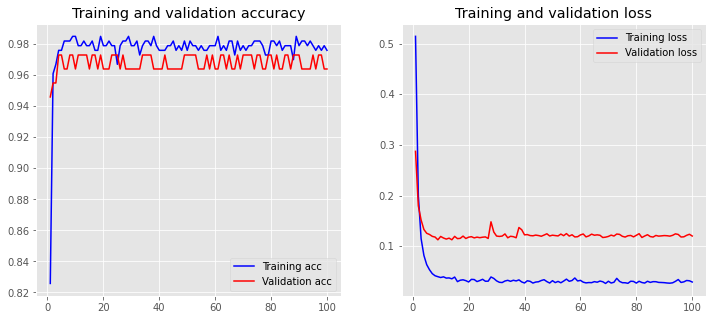

In [98]:
plot_history(history)

In [123]:
clear_session()

# Word embeddings

In [117]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [110]:
# can be done with 'tokens' column also, but since we alread did train-test split, using what we already have

tokenizer = Tokenizer() # num_words=5000
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1  # reserved 0 index

print(vocab_size)

# Check output, note: index will vary, this is not critical
print(x_train[2][:26])
print(X_train[2][:3])

4271
recent year disinformation
[51, 174, 9]


In [119]:
print('vocab_size')
print(vocab_size)


vocab_size
4271


In [120]:
longest_text = len(max(X_train, key=len))
print('longest_text')
print(longest_text)

longest_text
173


In [118]:
maxlen = longest_text

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Check output (see end of list)
print(X_train[0, :])


[  80    9 1841   14   13  174  684  103  212   67  361   80 1842  197
 1843   39  636   40  152  122  443   87  314  505  474  505  141  444
  189 1102  198 1103  110  142  294  865  866  546 1104  362  546 2591
  547  101 2592  156   14   13  213 2593  506 1105 1483   15    3   18
 1105  117  103  182   47 2594   61   86    3   14  199  117   58  200
  161  772   94  583  475  416  233   38   44 1844   25  113   29  773
 1106  584 1252 1484   29   41 2595  867  363  868  330  685 1253 2596
   41 1845 2597  868  277 1846    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]


# Keras with Embedding

In [138]:
# Note maxpooling layer

clear_session() # reset fit

embedding_dim = 50

model = Sequential()

model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 173, 50)           213550    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 214,071
Trainable params: 214,071
Non-trainable params: 0
_________________________________________________________________


In [139]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10) # increase for not test-data



Epoch 1/50
34/34 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5646 - val_loss: 0.6827 - val_accuracy: 0.6306
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.8468 - val_loss: 0.6601 - val_accuracy: 0.9009
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.9339 - val_loss: 0.6023 - val_accuracy: 0.9550
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.9730 - val_loss: 0.4938 - val_accuracy: 0.9640
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.9760 - val_loss: 0.3629 - val_accuracy: 0.9640
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.9820 - val_loss: 0.2493 - val_accuracy: 0.9730
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 0.1814 - accuracy: 0.9820 - val_loss: 0.1718 - val_accuracy: 0.9730
Epoch 8/50
34/34 [==

Training Accuracy: 0.9850
Testing Accuracy:  1.0000


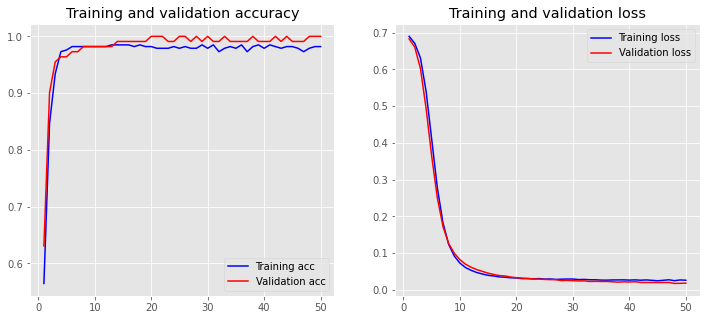

In [140]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)


# CNN Model

In [239]:
clear_session() # reset fit

embedding_dim = 50

model = Sequential()

model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(64, 3, activation='relu')) #128, 5

#model.add(layers.MaxPooling1D(pool_size=16))
#model.add(layers.Flatten())
## Delete above 2 layers if below added
model.add(layers.GlobalMaxPooling1D())
        
model.add(layers.Dense(10, activation='relu')) #10
model.add(layers.Dense(1, activation='sigmoid'))

#Adadelta #RMSProp also good for this use case but increase Epochs
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


# model.add(layers.LeakyReLU(alpha=.2)) #new

# ##model.add(BatchNormalization())
#  OR - NOT BOTH EVER!
# #model.add(layers.Dropout(.3))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 173, 50)           211050    
                                                                 
 conv1d (Conv1D)             (None, 171, 64)           9664      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221,375
Trainable params: 221,375
Non-trainable params: 0
__________________________________________________

In [240]:
history = model.fit(X_train, y_train,
                    epochs=20, # naturally, more for more data
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10) #32 por 64 for full data


Epoch 1/20
11/11 [==============================] - 1s 34ms/step - loss: 0.6892 - accuracy: 0.6456 - val_loss: 0.6797 - val_accuracy: 0.8559
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.9850 - val_loss: 0.6568 - val_accuracy: 0.9189
Epoch 3/20
11/11 [==============================] - 0s 4ms/step - loss: 0.6174 - accuracy: 0.9910 - val_loss: 0.6188 - val_accuracy: 0.9640
Epoch 4/20
11/11 [==============================] - 0s 5ms/step - loss: 0.5552 - accuracy: 0.9880 - val_loss: 0.5456 - val_accuracy: 0.9820
Epoch 5/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.9820 - val_loss: 0.4343 - val_accuracy: 0.9910
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.3496 - accuracy: 0.9820 - val_loss: 0.3054 - val_accuracy: 0.9820
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 0.2278 - accuracy: 0.9820 - val_loss: 0.1907 - val_accuracy: 0.9820
Epoch 8/20
11/11 [=

Training Accuracy: 0.9970
Testing Accuracy:  0.9640


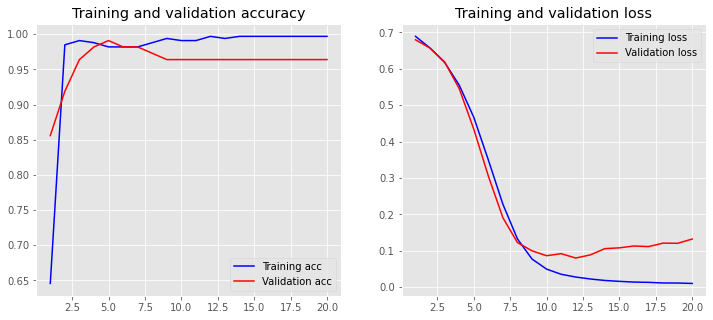

In [241]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# CNN grid search
All code here "stolen" - alteration in progress

In [213]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [246]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    
    #model.add(layers.MaxPooling1D(pool_size=16))
    #model.add(layers.Flatten())
    model.add(layers.GlobalMaxPooling1D())
    
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [247]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7, 10],
                  vocab_size=vocab_size, 
                  embedding_dim=[50, 100, 150],
                  maxlen=longest_text)


In [250]:

# Main settings
epochs = 20
embedding_dim = 50
maxlen = longest_text
output_file = 'output.txt'

# Run grid search for each source ()
#for source, frame in df.groupby('source'):
print('Running grid search for data set :', filename)

sentences = df['tokens_merged'].values
y = df['key'].values

# Train-test split
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

# Tokenize words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Parameter grid for grid search

param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7, 10],
                  vocab_size=[vocab_size], 
                  embedding_dim=[50, 100, 150],
                  maxlen=[longest_text])

model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=10,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                            cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)

# Save and evaluate results
# prompt = input(f'finished {source}; write to file and proceed? [y/n]')
# if prompt.lower() not in {'y', 'true', 'yes'}:
#     break

with open(output_file, 'a') as f:
    s = ('Running {} data set\nBest Accuracy : '
            '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
        filename,
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)
    print(output_string)
    f.write(output_string)


Running grid search for data set : arxiv_deepfake.csv
Fitting 4 folds for each of 5 candidates, totalling 20 fits


/tmp/ipykernel_8151/2247271055.py:39: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,


Running arxiv_deepfake.csv data set
Best Accuracy : 0.9790
{'vocab_size': 4221, 'num_filters': 64, 'maxlen': 173, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy : 0.9640


